In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 1. ER phase transitions

## a) ER graph component sizes

In [29]:
def analyze_er_graph_components(n, p_range, graphs_per_p=20):
    means, sds = [], []
    for p in p_range:
        print('Analyzing ER graphs for p={}'.format(p))
        comp_sizes = []
        for i in range(graphs_per_p):
            G = nx.generators.fast_gnp_random_graph(n, p, seed=i)
            comp_sizes.append(len(max(nx.connected_components(G), key=len)))
        means.append(np.mean(comp_sizes))
        sds.append(np.std(comp_sizes))

    return np.array(means), np.array(sds)


In [68]:
n = 5000
p_range = np.logspace(-5, -2, num=20)
means, sds = analyze_er_graph_components(n, p_range)

Analyzing ER graphs for p=1e-05
Analyzing ER graphs for p=1.438449888287663e-05
Analyzing ER graphs for p=2.06913808111479e-05
Analyzing ER graphs for p=2.9763514416313192e-05
Analyzing ER graphs for p=4.281332398719396e-05
Analyzing ER graphs for p=6.158482110660267e-05
Analyzing ER graphs for p=8.858667904100833e-05
Analyzing ER graphs for p=0.00012742749857031334
Analyzing ER graphs for p=0.00018329807108324357
Analyzing ER graphs for p=0.00026366508987303583
Analyzing ER graphs for p=0.000379269019073225
Analyzing ER graphs for p=0.0005455594781168515
Analyzing ER graphs for p=0.0007847599703514606
Analyzing ER graphs for p=0.0011288378916846883
Analyzing ER graphs for p=0.001623776739188721
Analyzing ER graphs for p=0.002335721469090121
Analyzing ER graphs for p=0.003359818286283781
Analyzing ER graphs for p=0.004832930238571752
Analyzing ER graphs for p=0.0069519279617756054
Analyzing ER graphs for p=0.01


In [74]:
def plot_with_sds(x, y, y_sds):
    plt.plot(x, y)
    plt.plot(x, y - y_sds, c='gray', linestyle='dashed')
    plt.plot(x, y + y_sds, c='gray', linestyle='dashed')
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Mean largest component size for ER graphs')
    plt.xlabel('p (log scale)')
    plt.ylabel('Mean component size (log scale)')
    plt.legend(['Mean', 'Mean ± SD'])

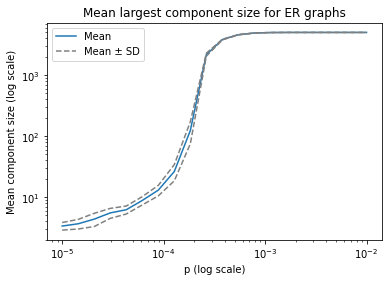

In [75]:
plot_with_sds(p_range, means, sds)

## b) Interesting values of p

In [71]:
'1 / n = {}; ln(n) / n = {}'.format(1 / n, np.log(n) / n)

'1 / n = 0.0002; ln(n) / n = 0.0017034386382832477'

TODO

# 2. Fitting power-law exponents

## b) Pareto sampling

In [141]:
def sample_pareto(alpha=1, x_0=1, size=100_000):
    pareto_func = np.vectorize(lambda u:  x_0 / u**(1 / alpha))
    u_samples = np.random.sample(size=size)
    return pareto_func(u_samples)

In [ ]:
def compute_pdf(samples):
    samples_ints = np.round(samples, decimals=0)
    samples_int_counts = Counter(samples_ints)
    x = np.array(sorted(samples_int_counts.keys()))
    px_x = np.array([samples_int_counts[k] for k in x])
    px_x = px_x / px_x.sum()
    return x, px_x

In [153]:
pareto = sample_pareto()
x, px_x = compute_pdf(pareto)

In [143]:
def plot_observations(x, y, alpha=1):
    plt.scatter(x, y, s=5)
    plt.xscale('log')
    plt.yscale('log')
    y_expected = 1 / x ** (alpha + 1)
    plt.plot(x[y_expected >= 1e-5], y_expected[y_expected >= 1e-5], c='green')
    plt.title('Sampled and actual PDFs for Pareto distribution')
    plt.legend(['Sampled', 'Actual'])
    plt.xlabel('x (log scale)')
    plt.ylabel('p(X = x) (log scale)')

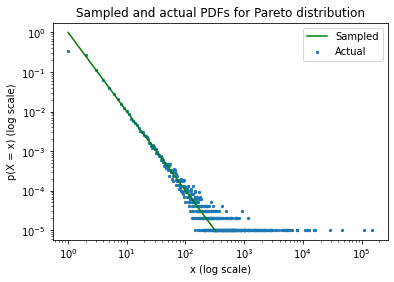

In [154]:
plot_observations(x, px_x)

## d) Estimating alpha

In [140]:
pareto = sample_pareto()

In [151]:
# X: integers
# y: log-log empirical distribution
x_log = np.log(x.reshape((x.shape[0], 1)))
y_log = np.log(y)
alpha_pred = np.linalg.lstsq(x_log, y_log) + 1

[[0.        ]
 [0.69314718]
 [1.09861229]
 [1.38629436]
 [1.60943791]
 [1.79175947]
 [1.94591015]
 [2.07944154]
 [2.19722458]
 [2.30258509]] [-1.09362475 -1.33116244 -2.16630747 -2.75955404 -3.23297475 -3.56807875
 -3.84483176 -4.16433793 -4.36065661 -4.58536756]


/tmp/ipykernel_8743/1928469008.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(x_log, y_log)


(array([-1.74429858]), array([1525.63844791]), 1, array([143.3158022]))